# 📘 USC Master in Artificial Intelligence — 2025  

This notebook corresponds to **Assignment — P1 Part-of-Speech (PoS) tagging**  for the Natural Language Understanding course of the USC Artificial Intelligence Master 2025. 

**Course:** Natural Language Understanding 

**Authors:** 
 - Gian Paolo Bulleddu ([gianpaolo.bulleddu@rai.usc.es])
 - Francisco --- ([])
-  Santiago .. ([])

**Teachers** 
 - Alejandro Catalá  ([alejandro.catala@usc.es])
 - Mario Izquierdo ([mario.izquierdo.alvarez@usc.es])

# Imports

In [1]:
import pickle
from NLUutils import parse_conllu_basic, build_tokenizer, build_tag_vocab, encode_sentences, encode_tags, debug_tokenizer, debug_tags
from posTaggerClass import PosTagger

2025-10-29 18:26:41.104306: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-29 18:26:41.126909: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8473] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-29 18:26:41.133087: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1471] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-29 18:26:41.149830: I tensorflow/core/platform/cpu_feature_guard.cc:211] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
MAX_LEN = 128                       # max sentence lenght
TOKENIZER_PATH = './tokenizer_en.pkl'  # tokenizer saving path
TAG2IDX_PATH = './tag2idx_en.pkl'      # tag2idx saving path
IDX2TAG_PATH = './idx2tag_en.pkl'      # idx2tag saving path
OOV_TOKEN = "[UNK]"
PAD_TOKEN = "[PAD]"

train_file = "./UD_English-EWT-master/en_ewt-ud-train.conllu"
val_file   = "./UD_English-EWT-master/en_ewt-ud-dev.conllu"
test_file  = "./UD_English-EWT-master/en_ewt-ud-test.conllu"

train_sents, train_tags = parse_conllu_basic(train_file)
val_sents, val_tags     = parse_conllu_basic(val_file)
test_sents, test_tags   = parse_conllu_basic(test_file)

tokenizer, VOCAB_SIZE = build_tokenizer(train_sents,oov_token=OOV_TOKEN, pad_token=PAD_TOKEN)
tag2idx, idx2tag = build_tag_vocab(train_tags)

with open(TOKENIZER_PATH, "wb") as f:
    pickle.dump(tokenizer, f)
print(f" Tokenizer saved to {TOKENIZER_PATH}")   

with open(TAG2IDX_PATH, "wb") as f:
    pickle.dump(tag2idx, f)
print(f" tag2idx saved to {TAG2IDX_PATH}")      
    
with open(IDX2TAG_PATH, "wb") as f:
    pickle.dump(idx2tag, f)
print(f" idx2tag saved to {IDX2TAG_PATH}")    
 
DEBUG = True   # set to True to print tokenizer attributes
debug_tokenizer(tokenizer, debug=DEBUG)

X_train = encode_sentences(tokenizer, train_sents, MAX_LEN)
X_val   = encode_sentences(tokenizer, val_sents, MAX_LEN)
X_test  = encode_sentences(tokenizer, test_sents, MAX_LEN)

y_train = encode_tags(train_tags, tag2idx, MAX_LEN)
y_val   = encode_tags(val_tags, tag2idx, MAX_LEN)
y_test  = encode_tags(test_tags, tag2idx, MAX_LEN)

DEBUG = True   # set to True to print tokenizer attributes
debug_tags(tag2idx, idx2tag, y_encoded=y_train, debug=DEBUG)


 Tokenizer saved to ./tokenizer_en.pkl
 tag2idx saved to ./tag2idx_en.pkl
 idx2tag saved to ./idx2tag_en.pkl
==================== TOKENIZER DEBUG INFO  ====================
Vocabulary size: 16640
OOV token: [UNK]
Number of documents: 12543
Number of words considered (num_words): None

--- Top 10 words ---
 1. Word: '[UNK]          '  ID:    2  Count:    0  OOV: Yes
 2. Word: 'the            '  ID:    3  Count: 9066  OOV: 
 3. Word: '.              '  ID:    4  Count: 8639  OOV: 
 4. Word: ',              '  ID:    5  Count: 7017  OOV: 
 5. Word: 'to             '  ID:    6  Count: 5127  OOV: 
 6. Word: 'and            '  ID:    7  Count: 4984  OOV: 
 7. Word: 'a              '  ID:    8  Count: 3776  OOV: 
 8. Word: 'of             '  ID:    9  Count: 3616  OOV: 
 9. Word: 'i              '  ID:   10  Count: 3364  OOV: 
10. Word: 'in             '  ID:   11  Count: 3108  OOV: 

word_index (first 10): {'[UNK]': 2, 'the': 3, '.': 4, ',': 5, 'to': 6, 'and': 7, 'a': 8, 'of': 9, 'i': 10, 'i

# Buil/Train/Save Model

params {'lstm_units': 128, 'embedding_dim': 128, 'batch_size': 32, 'lstm_droput': 0.1, 'learning_rate': 0.001, 'input_dim': 16641, 'epochs': 50, 'patience': 3, 'model_path': 'pos_tag_en.keras', 'tokenizer_path': './tokenizer_en.pkl', 'tag2idx_path': './tag2idx_en.pkl', 'idx2tag_path': './idx2tag_en.pkl', 'max_len': 128, 'tag_size': 18, 'vocab_size': 16641, 'num_tags': 18, 'oov': '[UNK]'}


I0000 00:00:1761762404.026506    7744 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1761762404.106360    7744 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1761762404.106397    7744 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1761762404.109216    7744 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1761762404.109247    7744 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128)]             0         
                                                                 
 embedding (Embedding)       (None, 128, 128)          2130048   
                                                                 
 bidirectional (Bidirection  (None, 128, 256)          263168    
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 128, 18)           4626      
 ributed)                                                        
                                                                 
Total params: 2397842 (9.15 MB)
Trainable params: 2397842 (9.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/50


'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

  3/392 [..............................] - ETA: 50s - loss: 2.8835 - accuracy: 0.1165   

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


  5/392 [..............................] - ETA: 50s - loss: 2.8765 - accuracy: 0.1536

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


  7/392 [..............................] - ETA: 47s - loss: 2.8681 - accuracy: 0.1717

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


  9/392 [..............................] - ETA: 45s - loss: 2.8559 - accuracy: 0.1870

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 11/392 [..............................] - ETA: 44s - loss: 2.8418 - accuracy: 0.1876

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 13/392 [..............................] - ETA: 43s - loss: 2.8194 - accuracy: 0.1837

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 15/392 [>.............................] - ETA: 43s - loss: 2.7964 - accuracy: 0.1841

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 17/392 [>.............................] - ETA: 42s - loss: 2.7795 - accuracy: 0.1854

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 19/392 [>.............................] - ETA: 42s - loss: 2.7532 - accuracy: 0.1897

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 21/392 [>.............................] - ETA: 42s - loss: 2.7326 - accuracy: 0.1907

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 23/392 [>.............................] - ETA: 41s - loss: 2.7176 - accuracy: 0.1908

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 27/392 [=>............................] - ETA: 39s - loss: 2.6832 - accuracy: 0.1959

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 29/392 [=>............................] - ETA: 39s - loss: 2.6671 - accuracy: 0.1987

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 31/392 [=>............................] - ETA: 39s - loss: 2.6539 - accuracy: 0.2027

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 34/392 [=>............................] - ETA: 38s - loss: 2.6337 - accuracy: 0.2065

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 36/392 [=>............................] - ETA: 38s - loss: 2.6207 - accuracy: 0.2069

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 39/392 [=>............................] - ETA: 37s - loss: 2.6038 - accuracy: 0.2076

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 42/392 [==>...........................] - ETA: 37s - loss: 2.5868 - accuracy: 0.2107

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 44/392 [==>...........................] - ETA: 36s - loss: 2.5753 - accuracy: 0.2156

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 46/392 [==>...........................] - ETA: 36s - loss: 2.5610 - accuracy: 0.2192

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 50/392 [==>...........................] - ETA: 35s - loss: 2.5381 - accuracy: 0.2248

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 52/392 [==>...........................] - ETA: 35s - loss: 2.5264 - accuracy: 0.2273

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 53/392 [===>..........................] - ETA: 3:21 - loss: 2.5211 - accuracy: 0.2288

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

127/392 [========>.....................] - ETA: 1:15 - loss: 1.8433 - accuracy: 0.4600

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


132/392 [=========>....................] - ETA: 1:11 - loss: 1.8016 - accuracy: 0.4715

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

259/392 [==================>...........] - ETA: 21s - loss: 1.1523 - accuracy: 0.6589

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


262/392 [===================>..........] - ETA: 20s - loss: 1.1434 - accuracy: 0.6615

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

392/392 [==============================] - 32s 57ms/step - loss: 0.8600 - accuracy: 0.7455 - val_loss: 0.3379 - val_accuracy: 0.9006
Epoch 2/50
 16/392 [>.............................] - ETA: 11s - loss: 0.1866 - accuracy: 0.9460

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 19/392 [>.............................] - ETA: 13s - loss: 0.1886 - accuracy: 0.9462

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 24/392 [>.............................] - ETA: 14s - loss: 0.1892 - accuracy: 0.9464

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 32/392 [=>............................] - ETA: 14s - loss: 0.1937 - accuracy: 0.9466

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 39/392 [=>............................] - ETA: 13s - loss: 0.1886 - accuracy: 0.9481

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


100/392 [======>.......................] - ETA: 1:24 - loss: 0.1798 - accuracy: 0.9492

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


107/392 [=======>......................] - ETA: 1:17 - loss: 0.1793 - accuracy: 0.9495

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


108/392 [=======>......................] - ETA: 1:16 - loss: 0.1791 - accuracy: 0.9495

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

290/392 [=====================>........] - ETA: 11s - loss: 0.1696 - accuracy: 0.9514

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring f

392/392 [==============================] - 11s 29ms/step - loss: 0.1652 - accuracy: 0.9520 - val_loss: 0.2940 - val_accuracy: 0.9126
Epoch 3/50
 30/392 [=>............................] - ETA: 9s - loss: 0.0960 - accuracy: 0.9711

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 60/392 [===>..........................] - ETA: 2:32 - loss: 0.0958 - accuracy: 0.9719

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


279/392 [====================>.........] - ETA: 13s - loss: 0.0967 - accuracy: 0.9707

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


345/392 [=========================>....] - ETA: 4s - loss: 0.0971 - accuracy: 0.9705

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


354/392 [==========================>...] - ETA: 3s - loss: 0.0972 - accuracy: 0.9705

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


372/392 [===========================>..] - ETA: 1s - loss: 0.0969 - accuracy: 0.9705

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


383/392 [============================>.] - ETA: 0s - loss: 0.0967 - accuracy: 0.9705

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


392/392 [==============================] - 37s 94ms/step - loss: 0.0967 - accuracy: 0.9706 - val_loss: 0.2978 - val_accuracy: 0.9143
Epoch 4/50
  5/392 [..............................] - ETA: 29s - loss: 0.0598 - accuracy: 0.9848

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 67/392 [====>.........................] - ETA: 12s - loss: 0.0719 - accuracy: 0.9792

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


 89/392 [=====>........................] - ETA: 11s - loss: 0.0709 - accuracy: 0.9795

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


151/392 [==========>...................] - ETA: 8s - loss: 0.0692 - accuracy: 0.9794

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


166/392 [===========>..................] - ETA: 7s - loss: 0.0693 - accuracy: 0.9793

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


199/392 [==============>...............] - ETA: 6s - loss: 0.0700 - accuracy: 0.9791

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


208/392 [==============>...............] - ETA: 6s - loss: 0.0696 - accuracy: 0.9792

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


255/392 [==================>...........] - ETA: 4s - loss: 0.0690 - accuracy: 0.9793

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


293/392 [=====================>........] - ETA: 3s - loss: 0.0685 - accuracy: 0.9793

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


392/392 [==============================] - -11s -28303us/step - loss: 0.0692 - accuracy: 0.9790 - val_loss: 0.3162 - val_accuracy: 0.9122
Epoch 5/50
 15/392 [>.............................] - ETA: 11:46 - loss: 0.0462 - accuracy: 0.9864

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


154/392 [==========>...................] - ETA: 48s - loss: 0.0507 - accuracy: 0.9852

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


305/392 [======================>.......] - ETA: 10s - loss: 0.0512 - accuracy: 0.9846

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)


392/392 [==============================] - 14s 36ms/step - loss: 0.0515 - accuracy: 0.9844 - val_loss: 0.3174 - val_accuracy: 0.9148
save : Model saved to pos_tag_en.keras


/workspace/posTaggerClass.py:149: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


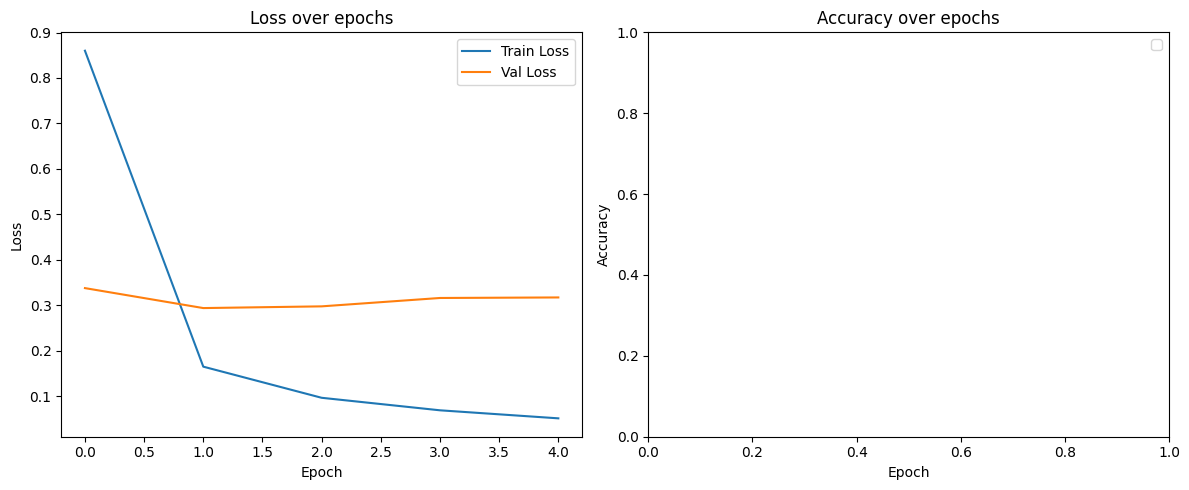

In [3]:
LSTM_UNITS = 128
EMB_DIM = 128
BATCH_SIZE = 32
LSTM_DROPOUT = 0.1
LEARNING_RATE = 0.001
EPOCHS = 50
PATIENCE = 3
MAX_LEN = 128
MODEL_PATH = "pos_tag_en.keras"

params = {
    'lstm_units': LSTM_UNITS,
    'embedding_dim' :EMB_DIM , 
    'batch_size': BATCH_SIZE,  
    'lstm_droput':LSTM_DROPOUT,
    'learning_rate':LEARNING_RATE,
    'input_dim': len(tokenizer.word_index) + 1,
    'epochs':EPOCHS,
    'patience':PATIENCE,
    'model_path':MODEL_PATH, 
    'tokenizer_path':TOKENIZER_PATH,
    'tag2idx_path': TAG2IDX_PATH,
    'idx2tag_path': IDX2TAG_PATH,
    'max_len':MAX_LEN ,
    'tag_size':len(tag2idx),
    'vocab_size':VOCAB_SIZE,
    'num_tags':len(tag2idx),
    'oov':OOV_TOKEN
}


tagger = PosTagger(params)
tagger.build_model()
history = tagger.train(X_train, y_train, X_val, y_val)
tagger.save()
tagger.plot(history)


# Evaluate

In [4]:
test_loss, test_acc = tagger.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

65/65 [==============================] - 1s 16ms/step - loss: 0.2807 - accuracy: 0.9151
Test Accuracy: 0.9151
Test Loss: 0.2807
Test Accuracy: 0.9151
Test Loss: 0.2807


# Test Prediction

In [ ]:
tagger.load()

In [ ]:
sentence_to_tag = "this is the model trained with english language"
tagger.predict_sentence(sentence_to_tag)

load : Model loaded from pos_tag_en.keras
load : tokenizer loaded from ./tokenizer_en.pkl
load :idx2tag loaded from ./idx2tag_en.pkl
1/1 [==============================] - 3s 3s/step

Predicted POS tags:
----------------------------------------
this             PRON        (conf: 1.00)
is               AUX         (conf: 0.99)
the              DET         (conf: 1.00)
model            NOUN        (conf: 1.00)
trained          VERB        (conf: 0.97)
with             ADP         (conf: 0.96)
english          PROPN       (conf: 0.80)
language         NOUN        (conf: 0.95)
----------------------------------------


In [ ]:
sentence = input()
tagger.predict_sentence(sentence)